# Intro
In this work, we present how to do data augmentation with torchvision. 
Reminder: Data augmentation is to add more data by doing some reasonable modifications(flipping, rotation, varying color..) on the existing data. This may be useful when our model is overfitting. To make it generalize well, one of the method is "Data Augmentation".
The dataset that we will be using is FashionMNIST available on torchvision.datasets

In [1]:
#import some libraries
import numpy as np
import random
import torch
import torchvision
from torchvision import transforms
from torch import nn
from torchvision.datasets import FashionMNIST

In [2]:
random.seed(123)

In [3]:
dataset = FashionMNIST('./data', train = True, download=False) #FashionMNIST dataset
print("Characteristics of one image: ",(dataset[0])) #May be useful when we want to do classification with CNN
print("Length of FashionMNIST: ", len(dataset)," images")

testset = FashionMNIST('./data', train= False)
print("Length of the test set in FashionMNIST: ", len(testset)," images")


Characteristics of one image:  (<PIL.Image.Image image mode=L size=28x28 at 0x7F06FF820E80>, tensor(9))
Length of FashionMNIST:  60000  images
Length of the test set in FashionMNIST:  10000  images


In [4]:
#Display some images in the dataset before data augementation

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 10, 40

#plt.figure(figsize=(10,40))
def show_dataset(dataset, n = 4):
   
    img = np.vstack(
            (np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(10))
        )
    plt.imshow(img)
    plt.axis('off')
#in show_dataset, what we do is: we select the number of different item we want to plot. In this case we choose 10
#then, n is the number of different representation for each item. The different representation are stocked horizontally
#np.hstack((np.asarray(dataset[i][0]) for _ in range(n)) "np.asarray(dataset[i][0]" converts as a matrix
#all the representations of the different items are stocked in a np.vstack

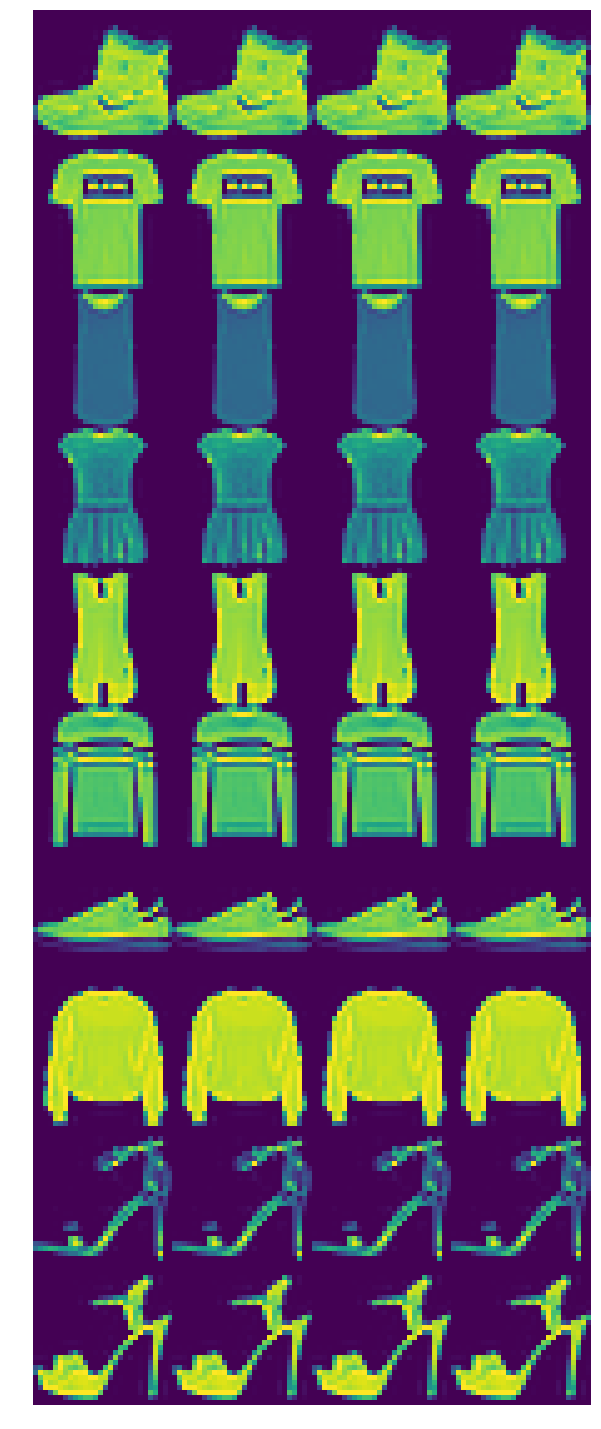

In [5]:
show_dataset(dataset)

In [6]:
#Now let's set our tranformations for data augmentation
transforms = torchvision.transforms.Compose([
        torchvision.transforms.Resize((200,200)),#crop some images
        torchvision.transforms.ColorJitter(brightness=0.6, saturation=0.3), #vary the color
        torchvision.transforms.RandomAffine(degrees=(-20,90))#Random affine transformation of the image keeping center invariant
    ])

In [7]:
#apply the transformations to our dataset
new_dataset = FashionMNIST('./data', transform=transforms)

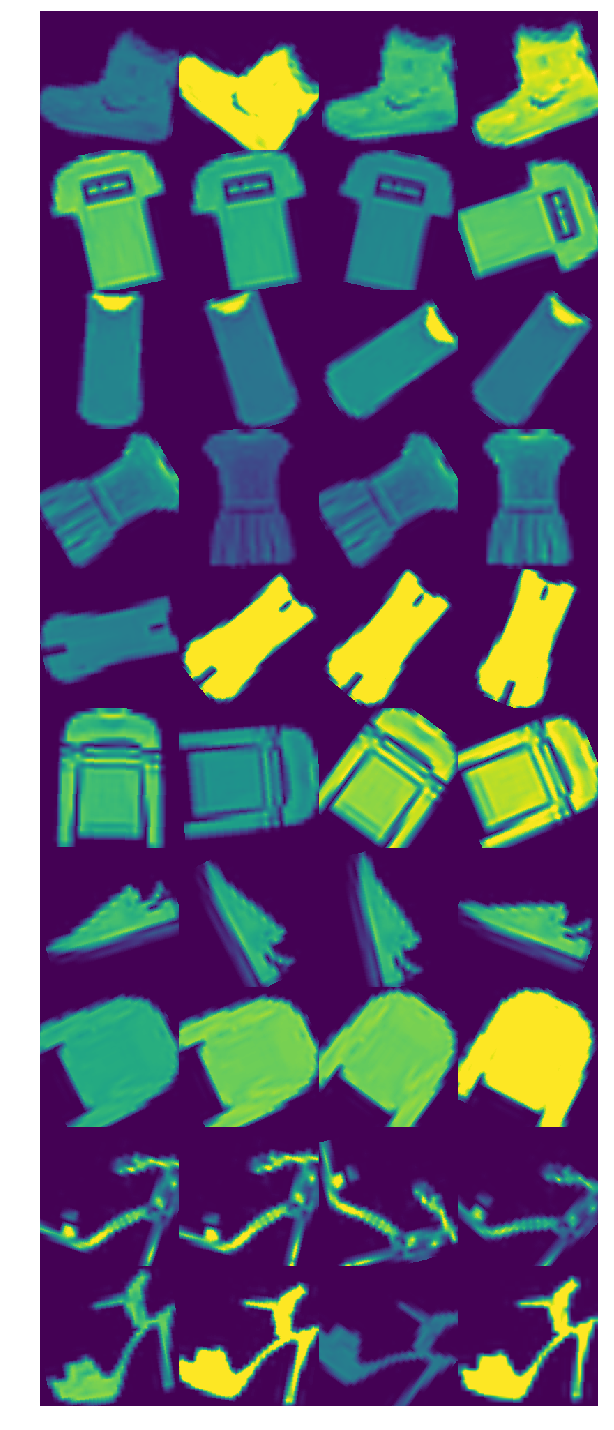

In [8]:
show_dataset(new_dataset)

# Next Step

Now we can try to do classification with data augmentation and see how our model is going to behave